# 빅데이터 분석 특강 (midterm 대비)

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis]

### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

---

### `1`. 인지할 것

- 계산은 같은 자료형끼리, keras는 소수점 맞춰서

In [3]:
tf.constant(1.0,dtype=tf.float64) + tf.constant(3.14,dtype=tf.float64)

2022-04-23 08:13:19.821724: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-23 08:13:20.277096: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


<tf.Tensor: shape=(), dtype=float64, numpy=4.140000000000001>

In [4]:
tf.add(tf.constant(1.0,dtype=tf.float64), tf.constant(3.14,dtype=tf.float64)) # 덧셈 = +

<tf.Tensor: shape=(), dtype=float64, numpy=4.140000000000001>

In [5]:
tf.multiply(tf.constant([[1,2],[3,4]]),tf.constant([[5,6],[7,8]])) # 요소의 곱 = *

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 5, 12],
       [21, 32]], dtype=int32)>

In [6]:
tf.matmul(tf.constant([[1,2],[3,4]]),tf.constant([[5,6],[7,8]])) # 행렬의 곱 = @

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

In [7]:
tf.constant(np.diag([1,2,3,4])) # 텐서로 대각행렬 생성

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])>

In [8]:
tf.zeros([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [9]:
tf.ones([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [10]:
tf.linspace(0,1,10) # 0에서 1 사이의 10개 생성

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])>

- 차원 확장 없이 변경만 원할 때 `tf.concat`

In [11]:
tf.concat([tf.constant([[1,2]]), tf.constant([[3,4]])],axis=0) # 원하는 차원의 수 axis 입력 첫번째 = 0

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

- 차원을 확장하면서 변경을 원할 때 `tf.stack`

In [12]:
tf.stack([tf.constant([1,2,3,4]),tf.constant([1,2,3,4])],axis=1)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]], dtype=int32)>

- 자료형 확인

In [13]:
a = tf.Variable([1,2,3,4])
b = -a
type(a),type(b)

(tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.framework.ops.EagerTensor)

In [14]:
a = tf.Variable([1,2,3,4])
b = tf.Variable([-1,-2,-3,-4])
type(a),type(b)

(tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

In [15]:
a[:2] # 불러온 수의 전 위치까지만 불러온다.

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

### `2`. 

In [16]:
x = tnp.array([11.0,12.0,13.0,14.0,15.0])
y = tnp.array([17.7,18.5,21.2,23.6,24.2])

(a) 모형 $y_i=\beta_0+\beta_1 x_i$ 에 해당하는 네트워크를 keras를 이용하여 설계하고 손실함수를 정의하라. $(\beta_0,\beta_1)=(3,3)$ 일 경우의 loss를 계산하라.
- 손실함수는 MSELoss를 활용한다.

In [17]:
X = tf.concat([tf.ones(5,dtype=tf.float64).reshape(5,1),x.reshape(5,1)],axis=1)
y = y.reshape(5,1) 

In [18]:
X

<tf.Tensor: shape=(5, 2), dtype=float64, numpy=
array([[ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.]])>

In [19]:
X.T

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[ 1.,  1.,  1.,  1.,  1.],
       [11., 12., 13., 14., 15.]])>

In [20]:
beta = tf.linalg.inv(X.T @ X) @ X.T @ y
beta

2022-04-23 08:13:21.281547: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x5631fd34e110


<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-2.49],
       [ 1.81]])>

In [21]:
loss = -2*X.T @ y + 2*X.T@X@beta 
loss

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-7.67386155e-13],
       [-1.00044417e-11]])>

In [22]:
beta = tf.Variable(tnp.array([3.0,3.0]).reshape(2,1))
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[3.],
       [3.]])>

In [23]:
loss = -2*X.T @ y + 2*X.T@X@beta 
loss

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ 209.6],
       [2748.6]])>

(b) $(\beta_0,\beta_1)=(3,3)$ 에서 손실함수의 미분계수를 계산하라.

In [24]:
with tf.GradientTape() as tape:
    tape.watch(beta)
    yhat = X @ beta
    loss = (y-yhat).T@(y - yhat)

In [25]:
tape.gradient(loss, beta)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ 209.6],
       [2748.6]])>

In [26]:
(y-X @ beta).T@(y - X @ beta)

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[2212.18]])>

(c) 경사하강법을 통하여 $(\beta_0,\beta_1)=(3,3)$ 의 값을 1회 update하라. 여기에서 학습률은 0.01로 설정한다.

In [27]:
opt = tf.keras.optimizers.SGD(0.01)

In [28]:
with tf.GradientTape(persistent=False) as tape:
    tape.watch(beta)
    yhat = X @ beta
    loss = (y-yhat).T@(y-yhat)/5
slope = tape.gradient(loss,beta)
opt.apply_gradients([(slope,beta)])

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [29]:
beta

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[ 2.58080001],
       [-2.49719988]])>

### `3.` 아래와 같은 모형에서 시뮬레이션 된 자료가 있다고 하자.
$$y_i= \beta_0 + \beta_1 \exp(-x_i)+ \epsilon_i$$

여기에서 $\epsilon_i \overset{iid}\sim N(0,0.1^2)$ 이다. 시뮬레이션된 자료는 아래의 코드를 통하여 얻을 수 있다.

In [30]:
import pandas as pd 
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021BDA/master/_notebooks/2021-11-06-prob3.csv')
df.head()

,x,y
0,0.0,4.962202
1,0.1,4.889815
2,0.2,4.605782
3,0.3,4.491711
4,0.4,4.344537


자료를 시각화 하면 아래와 같다.

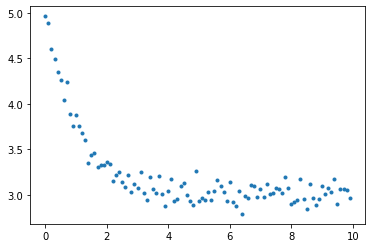

In [31]:
plt.plot(df.x,df.y,'.')

keras를 이용하여 적절한 $\beta_0, \beta_1$ 의 값을 구하여라. (손실함수는 MSEloss를 사용한다.)

In [32]:
x= np.array(df.x)
y= np.array(df.y)

In [33]:
_x = x.reshape(100,1)
_y = y.reshape(100,1)

In [34]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(optimizer='SGD',loss='mse')
net.fit(_x,_y,batch_size=100,epochs=1000,verbose=0) 

In [35]:
net.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.09727863]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([3.6987545], dtype=float32)>]

### `4`. 다음을 잘 읽고 물음에 O/X로 답하라. (25점)

`(1)` 경사하강법은 손실함수와 상관없이 언제나 전역최소해를 찾을 수 있다. 

X
- 손실함수 모양이 convex인 경우에만

`(2)` 확률적경사하강법은 손실함수와 상관없이 언제 전역최소해를 찾을 수 있다. 

X
- 손실함수 모양이 convex인 경우에만

`(3)` 일반근사정리(universal approximation theorem)는 충분히 깊은 신경망이 어떠한 함수든 표현할 수 있다는 내용의 이론이다. 

X
- 넓은 신경망에 대한 이론, 모든 함수 표현 가능, 특정 함수는 아님

`(4)` $y_i=\beta_0+\beta_1 x_i+\epsilon_i$ 와 같은 형태의 단순회귀모형은 학습해야할 파라메터가 2개이다. 

O
- $\beta_0$, $\beta_1 $ 2개

`(5)` 참모형(true model)이 단순회귀모형일 경우, 비선형 활성화 함수를 사용한 깊은신경망으로 모형을 적합시키면 오히려 적합력이 떨어진다. 

X
- x,y가 일반화되어있을떄는 비선형 활성화 함수(sigmoid, relu 등 MLP) 적합력은 올라가지만 overfitting issue가 생긴다.
- 파라메터 수, 즉 모형의 표현력이 증가하면 적합력이 올라감

`(6)` 확률적 경사하강법은 관측자료에 임의의 오차항을 더하여 학습시키는 방법이다. 

x
- 전체에서 미니배치로 나눠서 미니배치를 순서대로 학습하는 방법

`(7)` 경사하강법은 손실함수가 convex일 경우 언제나 전역최소해를 찾을 수 있다. 

O

`(8)` 로지스틱 모형에서 MSEloss를 사용하더라도 전역최소해를 찾는 경우가 있다. 즉 시그모이드 활성화 함수와 MSEloss를 사용한다고 하여도 항상 전역최소해를 찾지 못하는 것은 아니다. 

O
- sigmoid가 적절한

`(9)` 로지스틱 모형에서 MSELoss를 사용하면 옵티마이저를 Adam으로 선택하고 BCELoss를 사용하면 확률적 경사하강법을 사용한다. 

X
- Adam은 확률적 경사하강법을 개량시킨 것이기 떄문에 Adam을 쓰면 수렴이 잘 되고 optimizer 선택해야하는 rule은 없음

`(10)` 확률적 경사하강법은 컴퓨터의 자원을 효율적으로 활용할 수 있도록 도와준다. 

O
- 우리가 주로 쓰는 gpu, memory가 중요
- observation만 바꿔서 학습하는 방법 뭐지, 미니배치를 활용한 확률적 경사하강법
- 컴퓨터 자원을 효율적으로 활용할 수 있기 위해 나온 건 아니고 도와준다.

`(11)` 학습할 파라메터가 많을수록 GPU의 학습속도가 CPU의 학습속도 보다 빠르다. 

O

`(12)` GPU는 언제나 CPU보다 빠르게 모형을 학습한다. 

X

`(13)` CNN 모형에서 에서 2D콘볼루션은 비선형 변환이다. 

X
- 선형 변환

`(14)` 드랍아웃은 결측치를 제거하는 기법이다. 

X

`(15)` 모든 관측치를 활용하지 않고 일부의 관측치만 활용하여 학습하는 기법을 드랍아웃이라 한다. 

X
- 디자인 매트릭스 n * p 중 n에 일부를 버리진 않음.
- 오히려 이 문항은 미니배치와 적절>

`(16)` 확률적 경사하강법은 드랍아웃과 같이 사용할 수 없다. 

X
- 경사하강법은 optimizer에 사용, dropout은 아키텍쳐 단계.

`(17)` MLP의 모든 활성화 함수가 선형이라면 은닉층(Hidden Layer)을 아무리 추가하여도 모형의 표현력이 향상되지 않는다. 

O

`(18)` 학습할 파라메터수가 증가하면 언더피팅의 위험이 있다. 

X
- overfitting의 위험

`(19)` CAM은 CNN의 모든층에서 사용가능하다. 

X
- 최종 아웃풋에서만 시각화할 수 있음

`(20)` CAM은 CNN모형의 일부를 수정해야 한다는 점에서 단점이 있다. 

O

`(21)` CNN은 이미지 자료만 분석할 수 있다. 

X
- array 형태로 저장할 수 있는 자료에 특화되어 있음, 2d형태에 사용 가능

`(22)` 드랍아웃은 과적합을 방지하는 효과가 있다. 

O

`(23)` 예측 및 적합을 할때는 네트워크에서 드랍아웃층을 제거해야 한다. 

O

`(24)` BCELoss는 Softmax 활성화 함수와 잘 어울린다. 

X
- Sigmoid
- Softmax는 Cross Entropy Loss

`(25)` 파이토치에서 미분을 수행하는 메소드는 backward() 이다. keras는 tf.gradients

O

#### 그리드서치의 문제점 

`-` 비판1: [-10,10]이외에 해가 존재하면? 
- 이 예제의 경우는 운좋게 [-10,10]에서 해가 존재했음
- 하지만 임의의 고정된 $x,y$에 대하여 $loss(\beta)=(x\beta-y)^2$ 의 형태의 해가 항상 [-10,10]에서 존재한다는 보장은 없음
- 해결책: 더 넓게 많은 범위를 탐색하자?
    - -100 ~ 100으로 범위 잡던가~ but, 완전한 해결은 하지 못해..

`-` 비판2: 효율적이지 않음
- 알고리즘을 요약하면 결국 -10부터 10까지 작은 간격으로 조금씩 이동하며 loss를 조사하는 것이 grid search의 아이디어 
- $\to$ 생각해보니까 $\beta=2$인 순간 $loss=(\frac{1}{2}\beta-1)^2=0$이 되어서 이것보다 작은 최소값은 존재하지 않는다(제곱은 항상 양수이어야 하므로)
- $\to$ 따라서 $\beta=2$ 이후로는 탐색할 필요가 없다 

> Note: 이처럼 손실함수의 기울기(=경사)를 계산하여 점차적으로 가중치를 업데이트 하는 방식을 경사하강법이라고 부른다. 

#### 왼쪽/오른쪽중에 어디로 갈지 어떻게 판단하는 과정을 수식화?

`-` 아래와 같이 해석 가능
- 오른쪽으로 0.01 간다 = $\beta_{old}$에 0.01을 더함. (if, 미분계수가 음수)
- 왼쪽으로 0.01 간다 = $\beta_{old}$에 0.01을 뺌. (if, 미분계수가 양수)

`-` 수식화

$\beta_{new} = \begin{cases} \beta_{old} + 0.01, & loss'(\beta_{old}) <0 \\ \beta_{old} - 0.01,& loss'(\beta_{old})>0 \end{cases}$

### `5`. 식 정리

$$\hat{\beta}_0= \bar{y}-\hat{\beta}_1 \bar{x}$$

$$\hat{\beta}_1= \frac{S_{xy}}{S_{xx}}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

- x가 스칼라일떼

```python
Sxx= sum((x-sum(x)/10)**2
Sxy=  sum((x-sum(x)/10)*(y-sum(y)/10))
beta1_estimated = Sxy/Sxx
beta0_estimated = sum(y)/10 - beta1_estimated * sum(x)/10 
```

- x가 벡터일 때 loss 함수 정의 및 loss 미분 후 beta hat

$loss=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})={\bf y}^\top {\bf y} - {\bf y}^\top {\bf X}{\boldsymbol\beta} - {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$

```python
loss = (y-X@beta).T @ (y-X@beta)
# 어떻게 정의하느냐에 따라
yhat = X@beta
loss = (y-yhat).T @ (y-yhat)
```

$\boldsymbol{\hat\beta}= ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y} $

```python
beta_optim = tf.linalg.inv(X.T @ X) @ X.T @ y
```

### `7`. tf.GradientTape 에 관하여

```python
x = tf.Variable(2.0) 

with tf.GradientTape(persistent=True(미분 계속 안 되게 해),watch_accessed_variables=False(관찰하지마)) as myname: # 자동으로 감시되는 모드를 꺼라
    myname.watch(x) # 감시하는 옵션 사용
    a = x/2*3
    y = a*x**2
```

In [48]:
tf.random.set_seed(43052)
epsilon=tf.random.normal([10])
X = tnp.array([1]*10 +[20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]).reshape(2,10).T
beta = tnp.array([9.0,2.0]).reshape(2,1)
beta_true= tnp.array([10.2,2.2]).reshape(2,1)
y= X@beta_true+epsilon.reshape(10,1) 

In [49]:
with tf.GradientTape(persistent=True) as tape: 
    tape.watch(beta)
    yhat= X@beta
    loss= (y-yhat).T @(y-yhat) 

변수가 Variable로 생성되면 자동적으로 관찰되지만 constant로 생성되면 관찰되지 않으니 보고 싶다면 watch 추가하거나 variable로 생성하면 된다.

In [50]:
tape.gradient(loss,beta) # tf 기울기 미분한 계산값

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -126.78690968],
       [-3208.83947922]])>

loss 함수 정의 $\to$$loss = -2\bf{X}^\top \bf{y} + 2\bf{X}^\top \bf{XB}$

In [51]:
-2*X.T @ y + 2*X.T@X@beta  # 이론적 loss 계산값

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -126.78690968],
       [-3208.83947922]])>

이론적인 베타의 최적값 $\hat{\bf{B}} = (\bf{X}^\top \bf{X})^{-1}\bf{X}^\top \bf{y}$

> important: 시험 예상

`-`  이론적인 𝜷의 최적값을 찾아보고 (즉 𝜷̂ 을 찾고) 그 지점에서 loss의 미분값(=접선의 기울기)를 구하라. 결과가 0인지 확인하라. (단 0은 길이가 2이고 각 원소가 0인 벡터)

y를 최소화하는 x를 구해라 = loss를 최소화하는 beta를 구해라

In [52]:
beta_optimal = tf.linalg.inv(X.T @ X) @ X.T  @y  # 이보다 loss를 작게 만드는 beta는 없다.

In [55]:
with tf.GradientTape(persistent=True) as tape: 
    tape.watch(beta_optimal)
    yhat= X@beta_optimal
    loss= (y-yhat).T @(y-yhat) 
tape.gradient(loss,beta_optimal) # 베타 최적값

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-6.67910172e-12],
       [-1.67774636e-10]])>

In [57]:
with tf.GradientTape(persistent=True) as tape: 
    tape.watch(beta_true)
    yhat= X@beta_true
    loss= (y-yhat).T @(y-yhat) 
tape.gradient(loss,beta_true) #베타 true 값

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -2.74690968],
       [-71.45947922]])>

```python
beta = tf.Variable(-10.0)
alpha=0.01/6
opt = tf.keras.optimizers.SGD(alpha)
# tf.keras.optimizers.SGD.apply_gradients 이용
for epoc in range(10000):
    with tf.GradientTape() as tape:
        tape.watch(beta)
        loss = (beta/2-1)**2
    slope = tape.gradient(loss,beta)
    opt.apply_gradients([(slope,beta)])
beta
# tf.keras.optimizer.SGD.minimize 이용
loss_fn = lambda: (beta/2-1)**2
for epoc in range(10000):
    opt.minimize(loss_fn,beta)
beta
```